### Цель проекта - приоритизировать гипотезы, запустить A/B-тест и принять решение по результатам продолжительности теста, а также о его результате.

In [1]:
import pandas as pd
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors= pd.read_csv('/datasets/visitors.csv')
pd.options.display.max_colwidth = 100

In [3]:
hypothesis.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.8+ KB


In [6]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [7]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.5+ KB


----
## Часть 1. Приоритизация гипотез.

Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

----

In [8]:
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


Формулы:

ICE = (impact * confidence) / efforts

RICE = (reach * impact * confidence) / efforts

In [9]:
hypothesis.set_axis(hypothesis.columns.str.lower(), axis='columns', inplace=True)


In [10]:
hypothesis['ice'] = (hypothesis['impact']*hypothesis['confidence'] / hypothesis['efforts']).round(1)

In [11]:
hypothesis = hypothesis.sort_values('ice',ascending=False)
hypothesis

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0


По фреймворку ICE приоритетными являются гипотезы 8,0,7

In [12]:
hypothesis['rice']=(hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']) / hypothesis['efforts']
hypothesis = hypothesis.sort_values('rice',ascending=False)
hypothesis

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.0,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0


По фреймворку RICE приоритетными являются гипотезы 7,2,0

-----

## Вывод:

Гипотезы 7,2 в фреймворке RICE являются более приоритетными из-за того что охват(reach) у этих гипотез большой.

----

---

<div class="alert alert-block alert-success">
    

### Комментарий от наставника


Да, все верно) Насчет комментариев все хорошо)
</div>

---

## Часть 2. Анализ A/B-теста.

Проанализируйте A/B-тест:

- Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
- Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
- Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
- Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
- Примите решение по результатам теста и объясните его. 

Варианты решений:

- 1. Остановить тест, зафиксировать победу одной из групп. 
- 2. Остановить тест, зафиксировать отсутствие различий между группами. 
- 3. Продолжить тест.

Построим график кумулятивной выручки по группам.

In [13]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [14]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [15]:
datesGroups = orders[['date','group']].drop_duplicates()

Соберём агрегированные кумулятивные по дням данные о заказах.

In [16]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
                                     .agg({'date' : 'max',
                                           'group' : 'max', 
                                           'transactionId' : pd.Series.nunique,
                                           'visitorId' : pd.Series.nunique,
                                           'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина

In [17]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                                       .agg({'date' : 'max',
                                             'group' : 'max',
                                             'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

Объединим обе таблицы в одной с понятными названиями столбцов.

In [18]:
cummulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cummulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cummulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


Построим графики кумулятивной выручки по дням и группам A/B-тестирования.

In [19]:
cummulativeRevenueA = cummulativeData[cummulativeData['group']=='A'][['date','revenue', 'orders']]

In [20]:
cummulativeRevenueB = cummulativeData[cummulativeData['group']=='B'][['date','revenue', 'orders']]

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


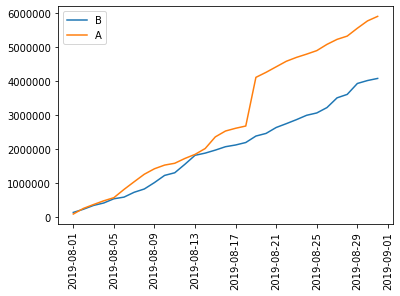

In [21]:
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue'], label='B')
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue'], label='A')
plt.legend()
plt.xticks(rotation = 90);

Выручка почти равномерно увеличивается в течение всего теста. Хороший знак.
Однако график выручки группы А в нескольких точках резко растёт. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.


<div class="alert alert-block alert-success">
    

### Комментарий от наставника

Да отлично! Верные предположения).</div>

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов.

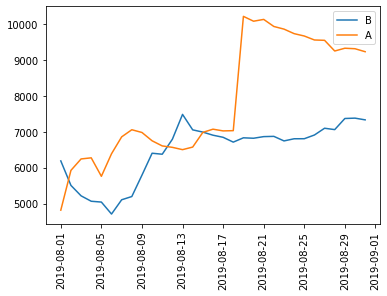

In [22]:
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue']/cummulativeRevenueA['orders'], label='B')
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue']/cummulativeRevenueB['orders'], label='A')
plt.legend()
plt.xticks(rotation = 90);

Средний чек имеет большие перепады, он не стабилен. Резко повышается для группы A и в дальнейшем продолжает падать. Для группы Б после нескольких резких повышений он стабилизировался. Видимо в группе А попадлись крупные заказы. Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

Построим график относительного различия для среднего чека. Добавим горизонтальную ось методом axhline() 

In [23]:
mergedCummulativeRevenue = cummulativeRevenueA.merge(cummulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

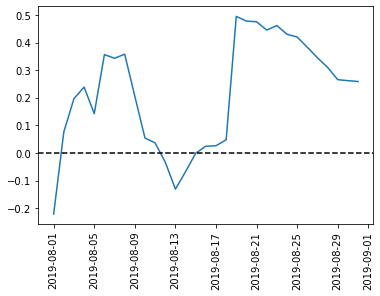

In [24]:
plt.plot(mergedCummulativeRevenue['date'], (mergedCummulativeRevenue['revenueB']/mergedCummulativeRevenue['ordersB'])/(mergedCummulativeRevenue['revenueA']/mergedCummulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation = 90)
plt.show()

График резко изменяется, значит точно существуют большие заказы и выбросы.


<div class="alert alert-block alert-success">
    

### Комментарий от наставника

Действительно -- этот график говорит нам об этом. А еще о том, что график среднего чека далеко от стабилизации.</div>

Построим и проанализируем график кумулятивной конверсии. Зададим масштаб осей методом plt.axis(). 

In [25]:
cummulativeData['conversion'] = cummulativeData['orders']/cummulativeData['visitors']

In [26]:
cummulativeDataA = cummulativeData[cummulativeData['group']=='A']

In [27]:
cummulativeDataB = cummulativeData[cummulativeData['group']=='B']

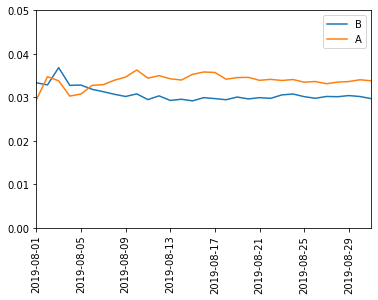

In [28]:
plt.plot(cummulativeDataA['date'], cummulativeDataA['conversion'], label='B')
plt.plot(cummulativeDataB['date'], cummulativeDataB['conversion'], label='A')
plt.legend()
plt.xticks(rotation = 90)
plt.axis(['2019-08-01', '2019-08-31', 0, 0.05]);

Группы колебались около одного значения, но затем конверсия группы A вырвалась вперёд и зафиксировалась, а конверсия группы B просела и также зафиксировалась.


<div class="alert alert-block alert-success">
    

### Комментарий от наставника

Да, коневерсия, в отличии от среднего чека, стабилизировалась.</div>

Построим график относительного различия кумулятивных конверсий группы B к группе A.

In [29]:
mergedCummulativeConversions = cummulativeDataA[['date','conversion']].merge(cummulativeDataB[['date','conversion']],
       left_on='date',
       right_on='date',
       how='left',
       suffixes=['A', 'B'])

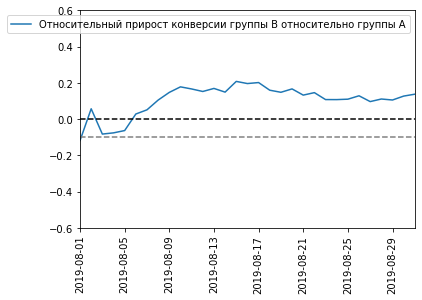

In [30]:
plt.plot(mergedCummulativeConversions['date'],
         mergedCummulativeConversions['conversionB']/mergedCummulativeConversions['conversionA']-1,
         label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.xticks(rotation = 90)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis(['2019-08-01', '2019-08-31', -0.6, 0.6]);

В начале теста группа В просела, затем стала показывать неплохой рост и стабилизировалась. В целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя.

Построим точечный график количества заказов по пользователям.

In [31]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [32]:
orders_count= orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId').agg({'transactionId':'nunique'})

In [33]:
orders_count.head()

,transactionId
visitorId,
5114589,1
6958315,1
8300375,2
11685486,1
39475350,1


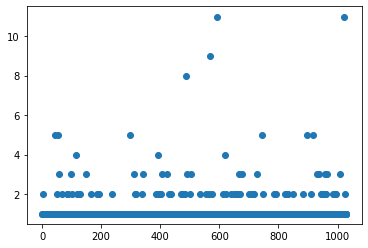

In [34]:
x_values = pd.Series(range(0,len(orders_count['transactionId'])))
plt.scatter(x_values, orders_count['transactionId']);

Большинство пользователей заказывают по 1 разу, больше 5ти раз мало кто заказывал, можем считать эти данные выбросом.

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [35]:
print(np.percentile(orders_count['transactionId'], [95, 99]))

[2. 4.]


Не более 5% пользователей делали заказ больше 2ух раз и не более 1% больше 4.

Построим точечный график стоимостей заказов.

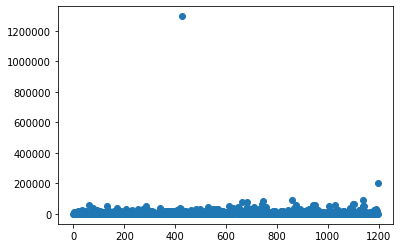

In [36]:
y_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(y_values, orders['revenue']);

Подозрительными являются как минимум два заказа которые дороже 200тысяч. Возможно это выбросы.

Посчитаем 95-й и 99-й перцентили стоимости заказов.

In [37]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Не более 5% пользователей делали заказ дороже 28000 и не более 1% дороже 58233.2.


<div class="alert alert-block alert-success">
    

### Комментарий от наставника

Все верно, графики помогают нам визуально оценить наличия выбросов, а квантили -- определить их границы.</div>

Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.

In [38]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']


In [39]:
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

In [40]:
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

In [41]:
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [42]:
ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

In [43]:
ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']


In [44]:
ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

In [45]:
ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

In [46]:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')


In [47]:
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Посчитаем статистическую значимость различия в конверсии между группами.
Создадим переменные ordersByUsersA и ordersByUsersB. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [48]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

In [49]:
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули

In [50]:
sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
                    name='orders')],axis=0)


In [51]:
sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
                    name='orders')],axis=0)

In [52]:
print('P-value:',"{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
#вычислим и выведем относительное различие в конверсии между группами. Округлим до 3 знаков после запятой.
print('Относительное различие в конверсии между группами:',"{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

P-value: 0.00840
Относительное различие в конверсии между группами: 0.138


P-value меньше 0.05. Значит, есть причина отвергнуть нулевую гипотезу и считать, что в среднем чеке есть различия. 

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 

In [53]:
print('P-value:',"{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительное различие в среднем чеке между группами:'"{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value: 0.365
Относительное различие в среднем чеке между группами:0.259


P-value больше 0.05 - статистически значимых отличий в среднем чеке между группами нет


<div class="alert alert-block alert-success">
    

### Комментарий от наставника
Да, верно
</div>

Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.

Узнаем, сколько всего аномальных пользователей методом shape(). Аномальными будем считать заказы дороже 59000

In [54]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 4]['visitorId'], ordersByUsersB[ordersByUsersB['orders'] > 4]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 59000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
Name: visitorId, dtype: int64
(14,)


Получается, что у нас всего 14 аномальных заказов. Посмотрим как изменились данные после удаления выбросов.

In [55]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0,
                                       index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
                                       name='orders')],
                            axis=0)

In [56]:
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0,
                                       index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
                                       name='orders')],
                            axis=0)

In [57]:
print('P-value:',"{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Разница между группами:',"{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value: 0.007
Разница между группами: 0.155


Результаты по конверсии практически не изменились (p-value было 0,00840, стало 0,007). Статистическая значимость достигнута. Группа В лучше группы А.


<div class="alert alert-block alert-success">
    

### Комментарий от наставника

Да, то что разница есть и с аномалиями и без них говорит о том что у нас был устойчивый выигрыш группы В по конверсиям. И по графику мы это видели)
</div>

In [58]:
print('P-value:',"{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print('Разница между группами:',"{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

P-value: 0.407
Разница между группами: 0.007


P-value увеличился, но и разница между группами сократилась с 25.9% до 0,7%. Это говорит нам о том, что выбросы могут очень сильно влият на результаты A/B-теста.


<div class="alert alert-block alert-success">
    

### Комментарий от наставника

Совершенно верно! Но обращу твое внимание что не было статистической значимости и по сырым данным тоже)
</div>

## Вывод.

Анализ "сырых данных" сообщает, что в конверсии между группами есть статистически значимые различия, а по данным после фильтрации аномалий различий практически нет. Тут явно видно, влияние выбросов (аномалий) на полученные результатык

Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий. Однако, разница в среднем чеке существенная.

График различия конверсии между группами сообщает, что результаты группы B лучше группы A и есть незначительной тенденция к улучшению ситуации.

Исходя их обнаруженных фактов, тест следует остановить, зафиксировать победу группы В.


<div class="alert alert-block alert-success">
    

### Общий комментарий от наставника

Критических замечаний у меня нет -- работа зачтена. Поздравляю!)
</div>